In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv("/Users/samreddyvarunreddy/Downloads/Dry_Eye_Dataset.csv")
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [99]:
df.shape

(20000, 26)

In [100]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [101]:
df.rename(columns={
    'discomfort_eye-strain': 'eye_strain',
    'itchiness/irritation_in_eye': 'itchy_eyes',
    'redness_in_eye': 'eye_redness'
}, inplace=True)

In [102]:
print("\nNumber of missing (null) values per column:")
print(df.isnull().sum())


Number of missing (null) values per column:
gender                     0
age                        0
sleep_duration             0
sleep_quality              0
stress_level               0
blood_pressure             0
heart_rate                 0
daily_steps                0
physical_activity          0
height                     0
weight                     0
sleep_disorder             0
wake_up_during_night       0
feel_sleepy_during_day     0
caffeine_consumption       0
alcohol_consumption        0
smoking                    0
medical_issue              0
ongoing_medication         0
smart_device_before_bed    0
average_screen_time        0
blue-light_filter          0
eye_strain                 0
eye_redness                0
itchy_eyes                 0
dry_eye_disease            0
dtype: int64


In [103]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

In [104]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [105]:

#symptom_cols = ['eye_strain', 'itchy_eyes', 'eye_redness']
for col in ['eye_strain', 'eye_redness', 'itchy_eyes']:
    print(f"Unique values in {col}:", df[col].unique())

Unique values in eye_strain: ['Y' 'N']
Unique values in eye_redness: ['Y' 'N']
Unique values in itchy_eyes: ['N' 'Y']


In [106]:
for col in ['eye_strain', 'eye_redness', 'itchy_eyes']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.upper().map({'Y': 1, 'N': 0})

In [107]:
df['symptom_score'] = df[['eye_strain', 'eye_redness', 'itchy_eyes']].sum(axis=1)

In [108]:
print(df[['eye_strain', 'eye_redness', 'itchy_eyes', 'symptom_score']].head())

   eye_strain  eye_redness  itchy_eyes  symptom_score
0           1            1           0              2
1           0            0           1              1
2           1            0           0              1
3           1            0           1              2
4           1            1           0              2


In [111]:
print(df[symptom_cols].head())

   eye_strain  itchy_eyes  eye_redness
0           1           0            1
1           0           1            0
2           1           0            0
3           1           1            0
4           1           0            1


In [112]:
def risk_level(score):
    if score == 3:
        return 'High'
    elif score == 2:
        return 'Medium'
    else:
        return 'Low'

In [113]:
df['dry_eye_risk_level'] = df['symptom_score'].apply(risk_level)

In [114]:
df.to_csv("/Users/samreddyvarunreddy/Downloads/Dry_Eye_Dataset_Cleaned_v2.csv", index=False)


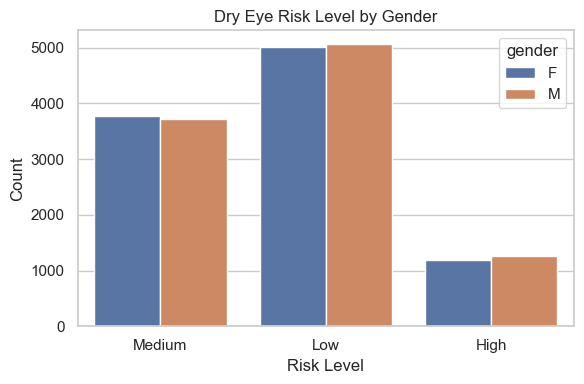

In [115]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='dry_eye_risk_level', hue='gender')
plt.title("Dry Eye Risk Level by Gender")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.tight_layout()
#plt.savefig("risk_level_by_gender.png")
plt.show()
plt.close()

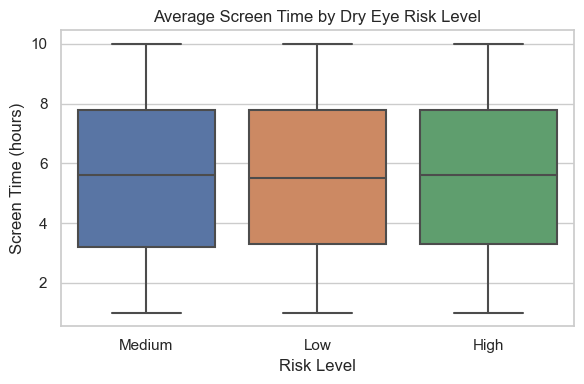

In [116]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='dry_eye_risk_level', y='average_screen_time')
plt.title("Average Screen Time by Dry Eye Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Screen Time (hours)")
plt.tight_layout()
plt.show()
#plt.savefig("screen_time_by_risk.png")
plt.close()

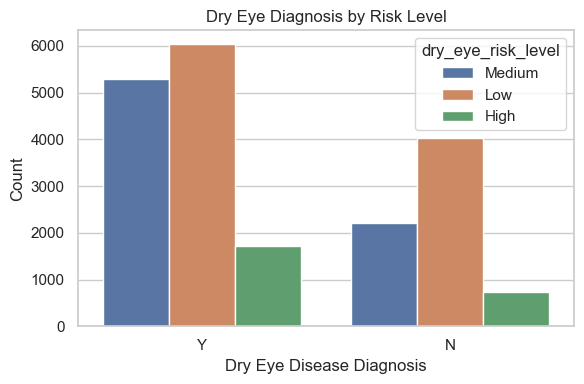

In [117]:
# Dry Eye Diagnosis by Risk Level
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='dry_eye_disease', hue='dry_eye_risk_level')
plt.title("Dry Eye Diagnosis by Risk Level")
plt.xlabel("Dry Eye Disease Diagnosis")
plt.ylabel("Count")
plt.tight_layout()
#plt.savefig("dry_eye_diagnosis_by_risk.png")
plt.show()
plt.close()

In [118]:
print("Summary Statistics (Numerical):")
print(df.describe())

Summary Statistics (Numerical):
                age  sleep_duration  sleep_quality  stress_level  \
count  20000.000000    20000.000000   20000.000000  20000.000000   
mean      31.422800        6.998245       2.997250      2.993750   
std        8.103717        1.731723       1.412283      1.407235   
min       18.000000        4.000000       1.000000      1.000000   
25%       24.000000        5.500000       2.000000      2.000000   
50%       31.000000        7.000000       3.000000      3.000000   
75%       39.000000        8.500000       4.000000      4.000000   
max       45.000000       10.000000       5.000000      5.000000   

         heart_rate   daily_steps  physical_activity        height  \
count  20000.000000  20000.000000       20000.000000  20000.000000   
mean      79.912200  10536.900000          90.069750    174.865900   
std       11.808279   5752.729186          52.317283     14.719903   
min       60.000000   1000.000000           0.000000    150.000000   
25%  

In [119]:
print("\nSummary (Categorical):")
print(df.select_dtypes(include='object').describe())


Summary (Categorical):
       gender blood_pressure sleep_disorder wake_up_during_night  \
count   20000          20000          20000                20000   
unique      2           1581              2                    2   
top         M         109/73              N                    N   
freq    10028             27          10069                10000   

       feel_sleepy_during_day caffeine_consumption alcohol_consumption  \
count                   20000                20000               20000   
unique                      2                    2                   2   
top                         N                    Y                   Y   
freq                    10178                10089               10009   

       smoking medical_issue ongoing_medication smart_device_before_bed  \
count    20000         20000              20000                   20000   
unique       2             2                  2                       2   
top          N             N           

In [120]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
gender                     0
age                        0
sleep_duration             0
sleep_quality              0
stress_level               0
blood_pressure             0
heart_rate                 0
daily_steps                0
physical_activity          0
height                     0
weight                     0
sleep_disorder             0
wake_up_during_night       0
feel_sleepy_during_day     0
caffeine_consumption       0
alcohol_consumption        0
smoking                    0
medical_issue              0
ongoing_medication         0
smart_device_before_bed    0
average_screen_time        0
blue-light_filter          0
eye_strain                 0
eye_redness                0
itchy_eyes                 0
dry_eye_disease            0
symptom_score              0
dry_eye_risk_level         0
dtype: int64


In [121]:
print("\nCorrelation Matrix:")
print(df.corr(numeric_only=True))



Correlation Matrix:
                          age  sleep_duration  sleep_quality  stress_level  \
age                  1.000000        0.004857       0.002513      0.008379   
sleep_duration       0.004857        1.000000      -0.006892     -0.006088   
sleep_quality        0.002513       -0.006892       1.000000      0.000721   
stress_level         0.008379       -0.006088       0.000721      1.000000   
heart_rate          -0.001196       -0.029175      -0.014326     -0.008332   
daily_steps          0.001302        0.002823      -0.003074     -0.005978   
physical_activity   -0.009191        0.001858      -0.010329      0.004272   
height              -0.005171        0.005259       0.009380     -0.000651   
weight               0.003908        0.000222       0.005604     -0.000611   
average_screen_time  0.003177       -0.004208       0.004697     -0.001344   
eye_strain          -0.001069        0.006544       0.001459      0.003889   
eye_redness         -0.010335        0.0043

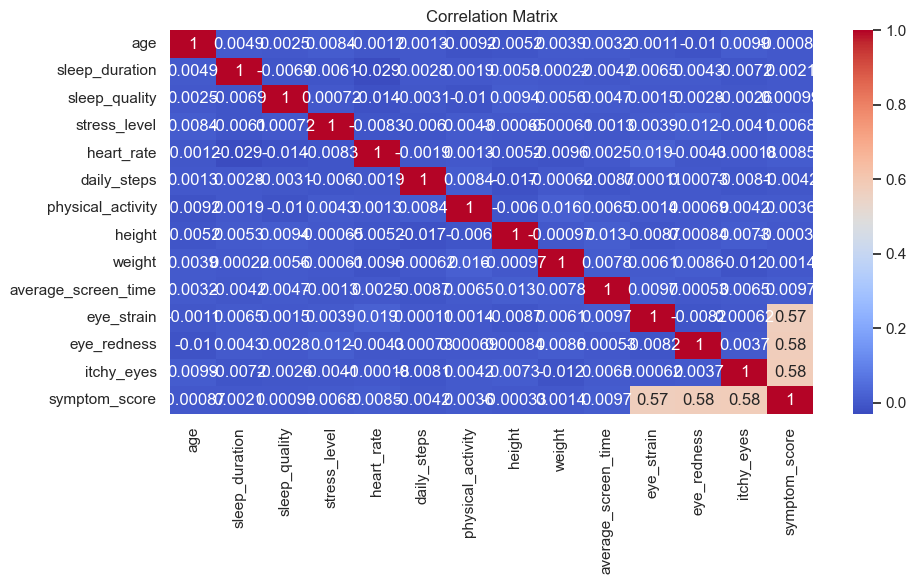

In [122]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
#plt.savefig("correlation_matrix.png")
plt.show()
plt.close()

In [123]:
crosstab_risk = pd.crosstab(df['dry_eye_disease'], df['dry_eye_risk_level'])
print("\nDry Eye Disease vs Risk Level:")
print(crosstab_risk)



Dry Eye Disease vs Risk Level:
dry_eye_risk_level  High   Low  Medium
dry_eye_disease                       
N                    729  4033    2201
Y                   1716  6031    5290


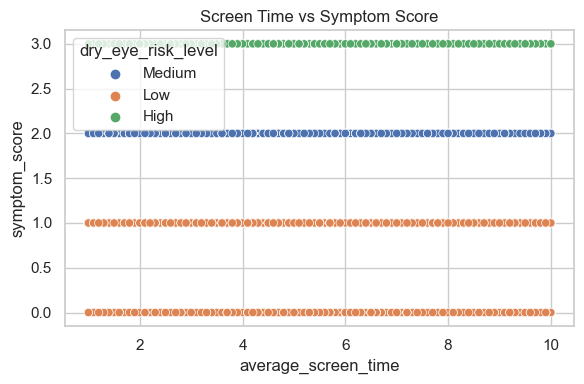

In [124]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='average_screen_time', y='symptom_score', hue='dry_eye_risk_level')
plt.title("Screen Time vs Symptom Score")
plt.tight_layout()
#plt.savefig("screen_time_vs_symptom_score.png")
plt.show()
plt.close()

In [127]:
print(df.groupby(['gender', 'dry_eye_disease']).size())

gender  dry_eye_disease
F       N                  3394
        Y                  6578
M       N                  3569
        Y                  6459
dtype: int64


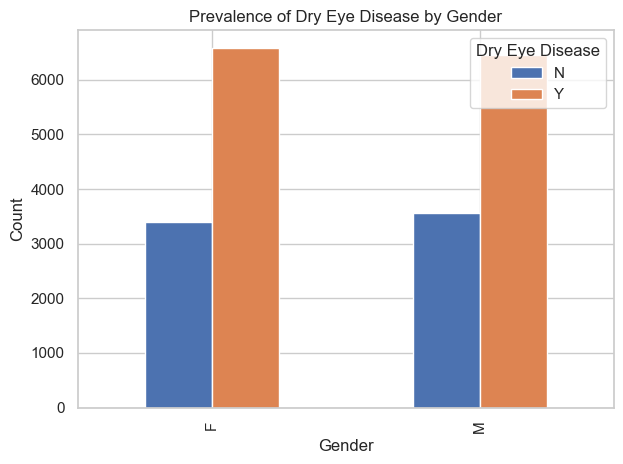

In [128]:
pd.crosstab(df['gender'], df['dry_eye_disease']).plot(kind='bar')
plt.title("Prevalence of Dry Eye Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Dry Eye Disease")
plt.tight_layout()
plt.show()

In [130]:
import pandas as pd


df['dry_eye_disease'] = df['dry_eye_disease'].str.strip().str.upper()
df['sleep_quality'] = pd.to_numeric(df['sleep_quality'], errors='coerce')

# Drop rows with missing data_
df_filtered = df.dropna(subset=['sleep_quality', 'dry_eye_disease'])

# Summary statistics
print(df_filtered.groupby('dry_eye_disease')['sleep_quality'].describe())

                   count      mean       std  min  25%  50%  75%  max
dry_eye_disease                                                      
N                 6963.0  3.006894  1.413790  1.0  2.0  3.0  4.0  5.0
Y                13037.0  2.992099  1.411504  1.0  2.0  3.0  4.0  5.0


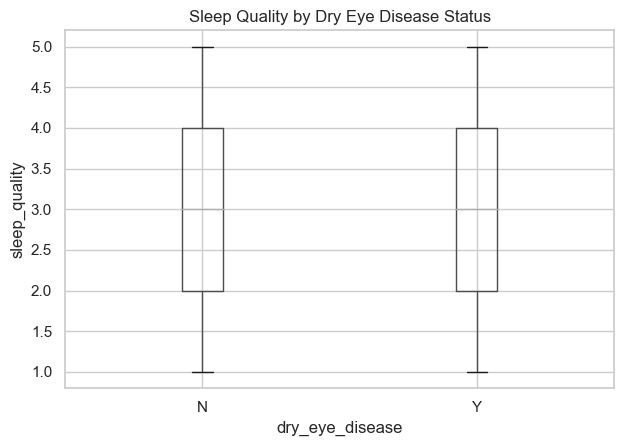

In [131]:
df_filtered.boxplot(column='sleep_quality', by='dry_eye_disease')
plt.title("Sleep Quality by Dry Eye Disease Status")
plt.suptitle("")
plt.xlabel("dry_eye_disease")
plt.ylabel("sleep_quality")
plt.tight_layout()
plt.show()

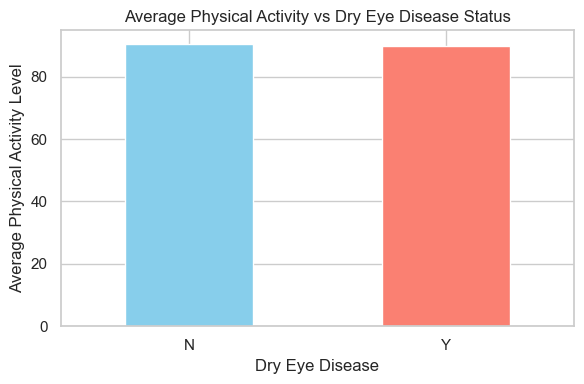

In [135]:
grouped = df.groupby('dry_eye_disease')['physical_activity'].mean()
plt.figure(figsize=(6, 4))
grouped.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Physical Activity vs Dry Eye Disease Status")
plt.xlabel("Dry Eye Disease")
plt.ylabel("Average Physical Activity Level")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

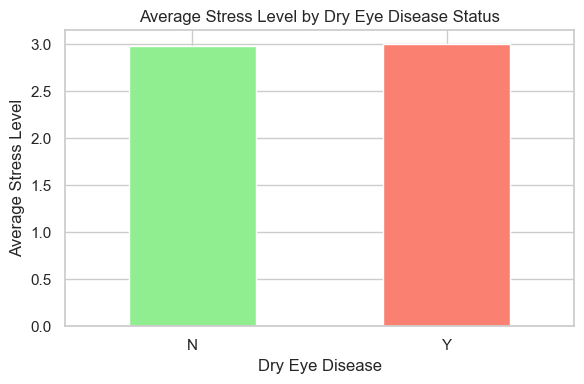

In [137]:
grouped_stress = df.groupby('dry_eye_disease')['stress_level'].mean()

# Plot
plt.figure(figsize=(6, 4))
grouped_stress.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Average Stress Level by Dry Eye Disease Status")
plt.xlabel("Dry Eye Disease")
plt.ylabel("Average Stress Level")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
